# Introduction to Data Science Project Report
## Part C : Machine Learning and Classification Problem
### Members
* Kaushik Jaiswal 16UCC046
* Vinayak Katiyar 16UCS212
* Ayush Goel      16UCC022
* Naman Agarwal   16UCS114
## About the Dataset
In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders

We used the [**Credit Card Default payment in Taiwan**]
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) to **predict whether the credit card holders are defaulters or Non-defaulters**. The Dataset and its attributes are described below



1. ID: ID of each client 
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

### Step1:Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Importing the Credit Card Default Dataset
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
dataset = pd.read_excel('data/UCI_Credit_Card.xls', skiprows=1)
#dataset = dataset.sample(n=2000,replace =False,random_state=1)

In [14]:
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [17]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**There are 2000 distinct credit card clients.**

**The average value for the amount of credit card limit is 171,825. The standard deviation is unusually large, max value being 730,000.**

**Education Level is mostly graduate school and university.**

**Most of the clients are either married or single .**

**Average age is 35.5 years, with a standard deviation of 9.2**

**As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).**

In [18]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [19]:
dataset.index = dataset['ID']

In [20]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [21]:
dataset.drop('ID',axis=1,inplace=True)

In [22]:
dataset.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1


In [23]:
dataset.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [24]:
dataset.isnull().sum()


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [25]:
dataset['SEX'].value_counts(dropna=False)

2    18112
1    11888
Name: SEX, dtype: int64

In [26]:
dataset['EDUCATION'].value_counts(dropna=False)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [27]:
dataset = dataset.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
dataset.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


### Step2: Data Visualisation and Analysis

Text(0.5, 1.0, 'SEX v/s COUNT')

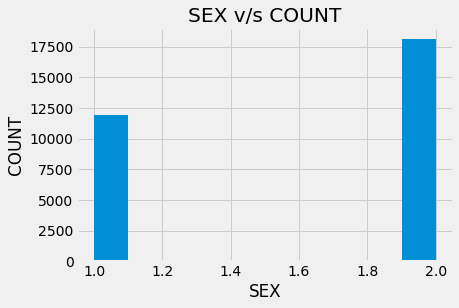

In [29]:
plt.style.use('fivethirtyeight')
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

**Number of Male credit holder is less than Female**

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

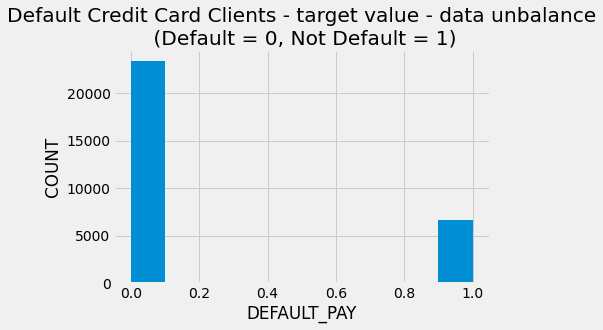

In [31]:
plt.style.use('fivethirtyeight')
dataset['default payment next month'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

**Percentage of Defaulters are smaller than the Non Defaulters in the given dataset**

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

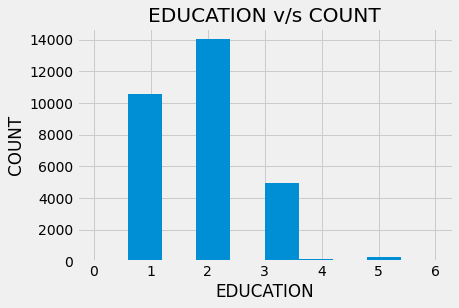

In [32]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

**More number of credit holders are university students followed by Graduates and then High school students**

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

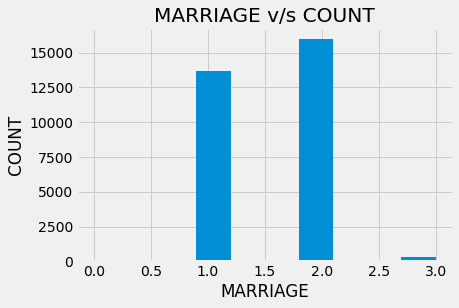

In [33]:
plt.style.use('fivethirtyeight')
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

**More number of credit cards holder are Married**

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

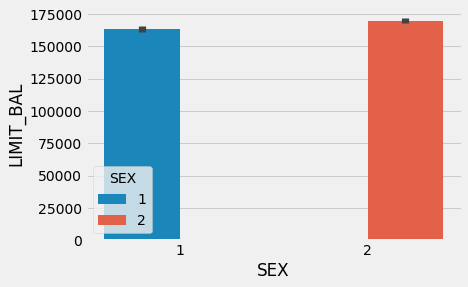

In [34]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=dataset,hue='SEX')


<AxesSubplot:xlabel='SEX', ylabel='count'>

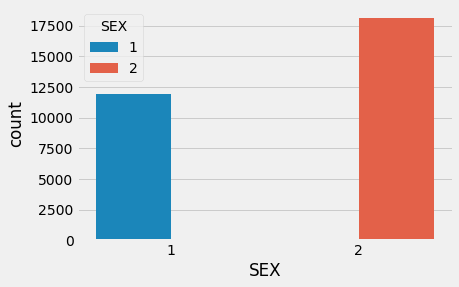

In [35]:
sns.countplot(x='SEX',data=dataset,hue = 'SEX')

<AxesSubplot:xlabel='SEX', ylabel='count'>

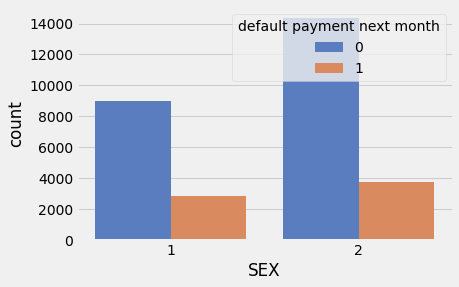

In [37]:
# Checking the number of counts of defaulters and non defaulters sexwise


sns.countplot(x='SEX', data=dataset,hue="default payment next month", palette="muted")  

**It is evident from the above output that females have overall less default payments wrt males**

**Non-Defaults have a higher proportion of Females (Sex=2)**

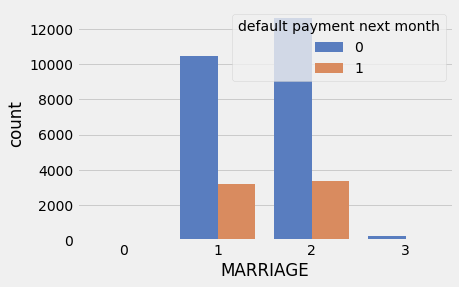

In [38]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="default payment next month", palette="muted")


**From the above plot it is clear that those people who have marital status single have less default payment wrt married status people**

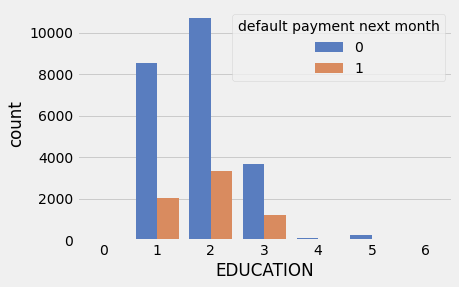

In [39]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="default payment next month", palette="muted")

**From the above plot it is clear that those people who are university students  have less default payment wrt graduates and high school people**

In [40]:

def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

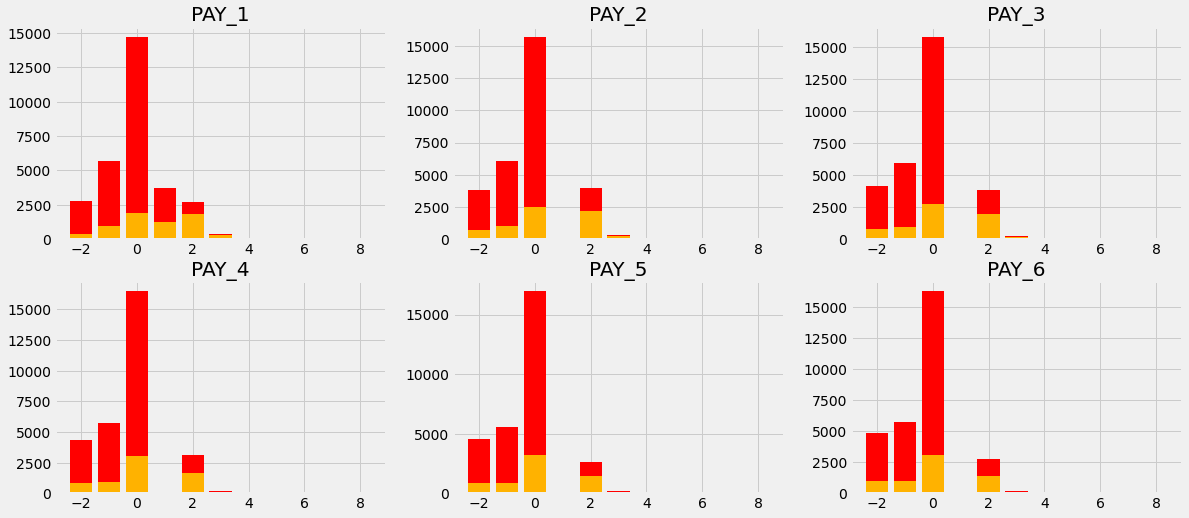

In [42]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['default payment next month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

**The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.**

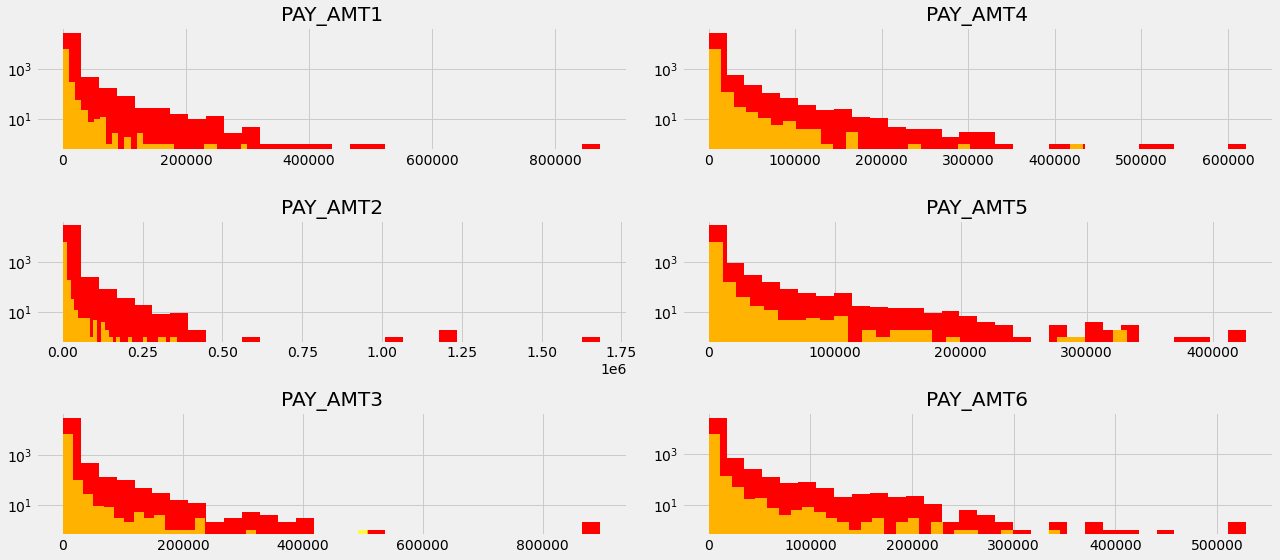

In [45]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(dataset[pay_amt_columns[i]][(dataset['default payment next month']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log')
plt.tight_layout()
plt.show()


**The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters**

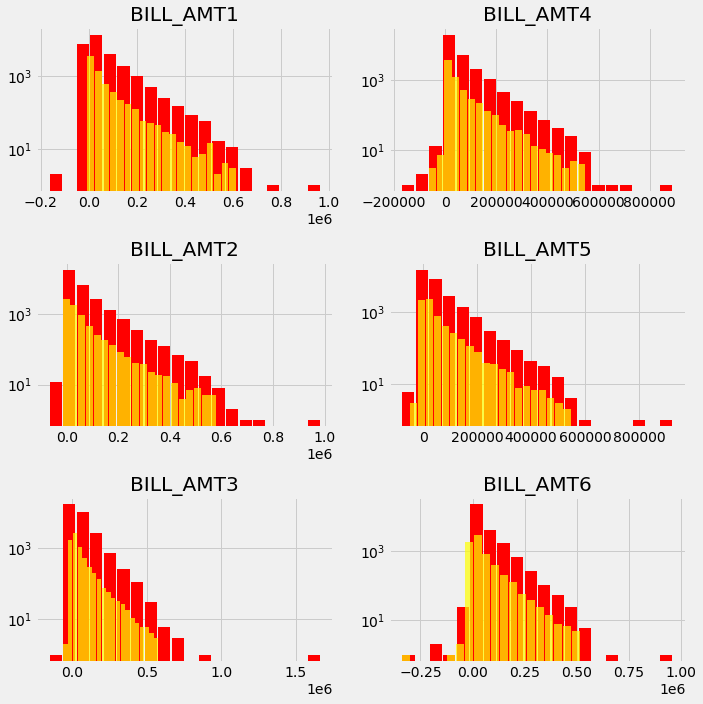

In [47]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(dataset[bill_atm_columns[i]][(dataset['default payment next month']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log')
plt.tight_layout()
plt.show()

**The above histogram shows the distribution of Bill amount generated  for each month explicitly for defaulters and non-defaulters**

<AxesSubplot:xlabel='default payment next month', ylabel='AGE'>

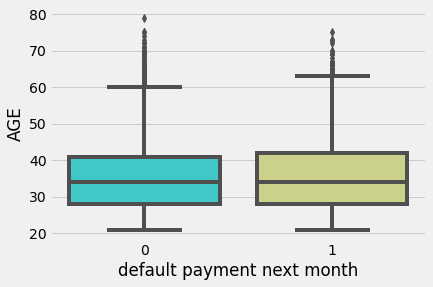

In [49]:
sns.boxplot(x='default payment next month',y='AGE',data=dataset,palette='rainbow')


<AxesSubplot:xlabel='default payment next month', ylabel='AGE'>

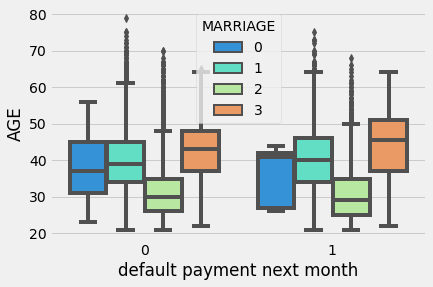

In [50]:
sns.boxplot(x='default payment next month',hue='MARRIAGE', y='AGE',data=dataset,palette="rainbow")


<AxesSubplot:xlabel='default payment next month', ylabel='AGE'>

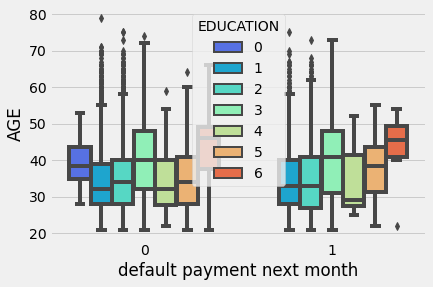

In [51]:
sns.boxplot(x='default payment next month',hue='EDUCATION', y='AGE',data=dataset,palette="rainbow" )


<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

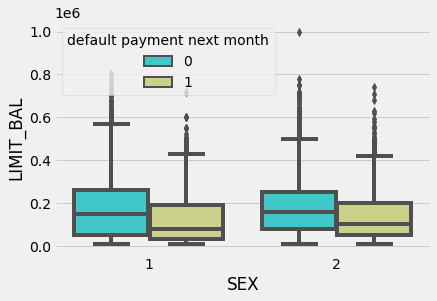

In [52]:
sns.boxplot(x='SEX',hue='default payment next month', y='LIMIT_BAL',data=dataset,palette="rainbow")


<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

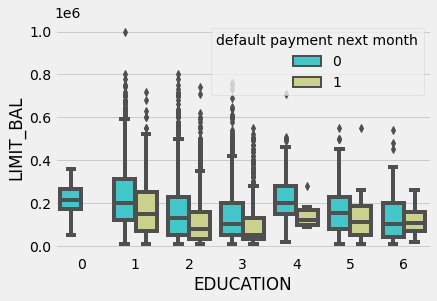

In [53]:
sns.boxplot(x='EDUCATION',hue='default payment next month', y='LIMIT_BAL',data=dataset,palette="rainbow")


<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

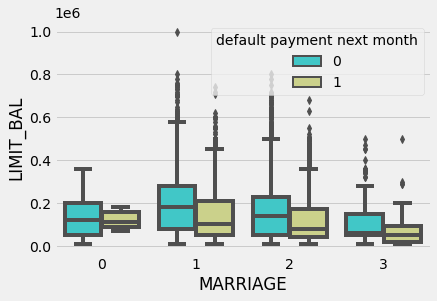

In [54]:
sns.boxplot(x='MARRIAGE',hue='default payment next month', y='LIMIT_BAL',data=dataset,palette="rainbow")


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

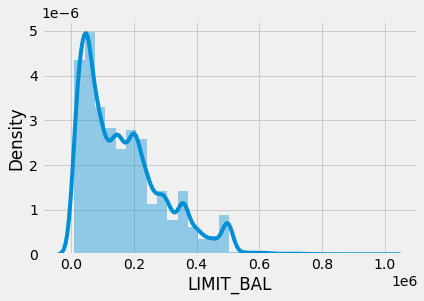

In [55]:
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

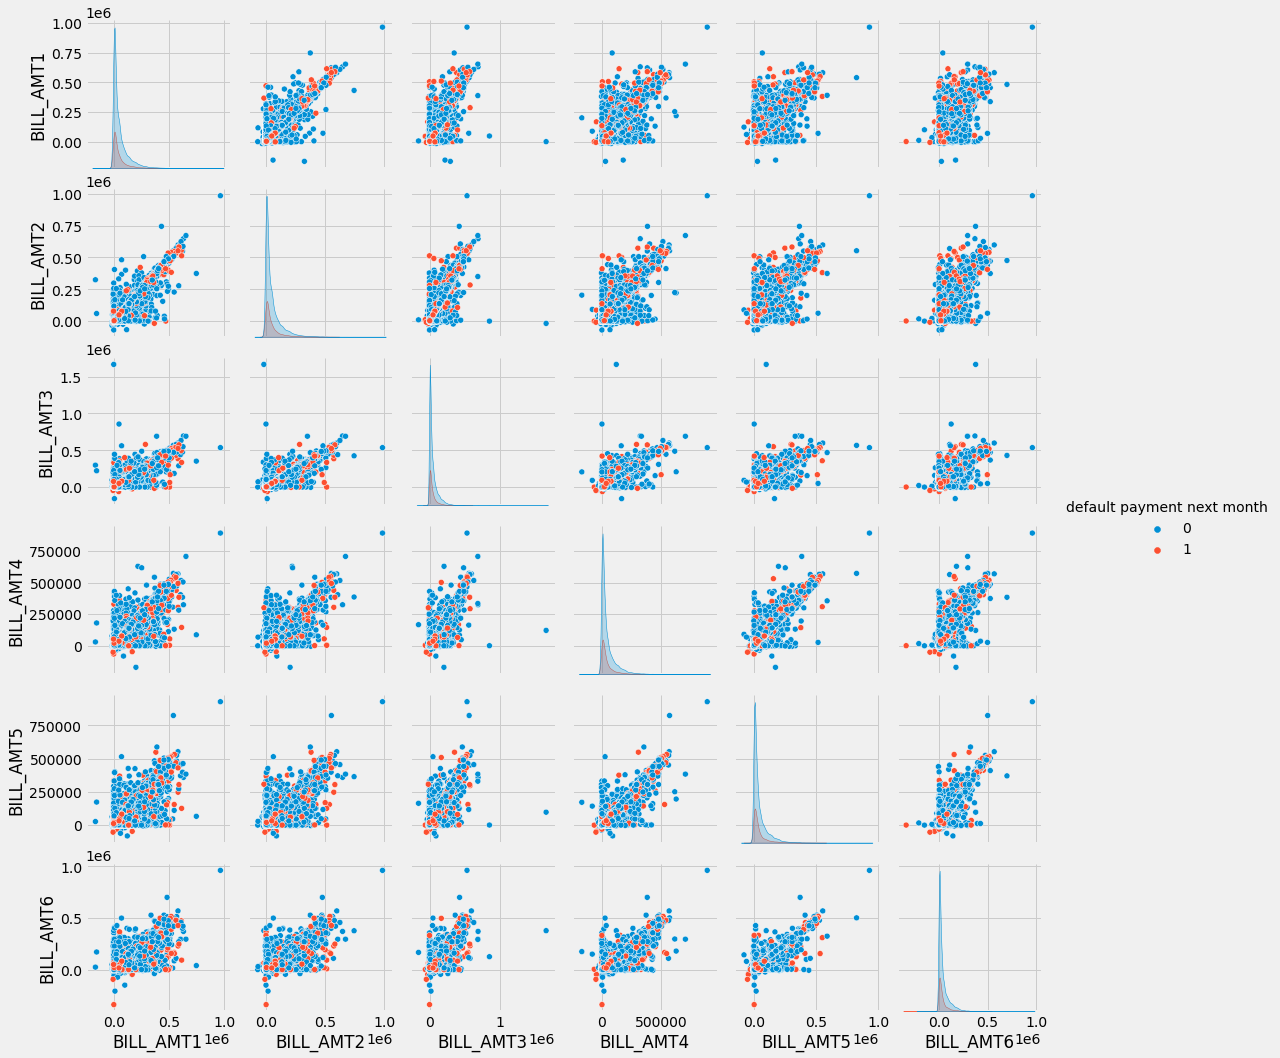

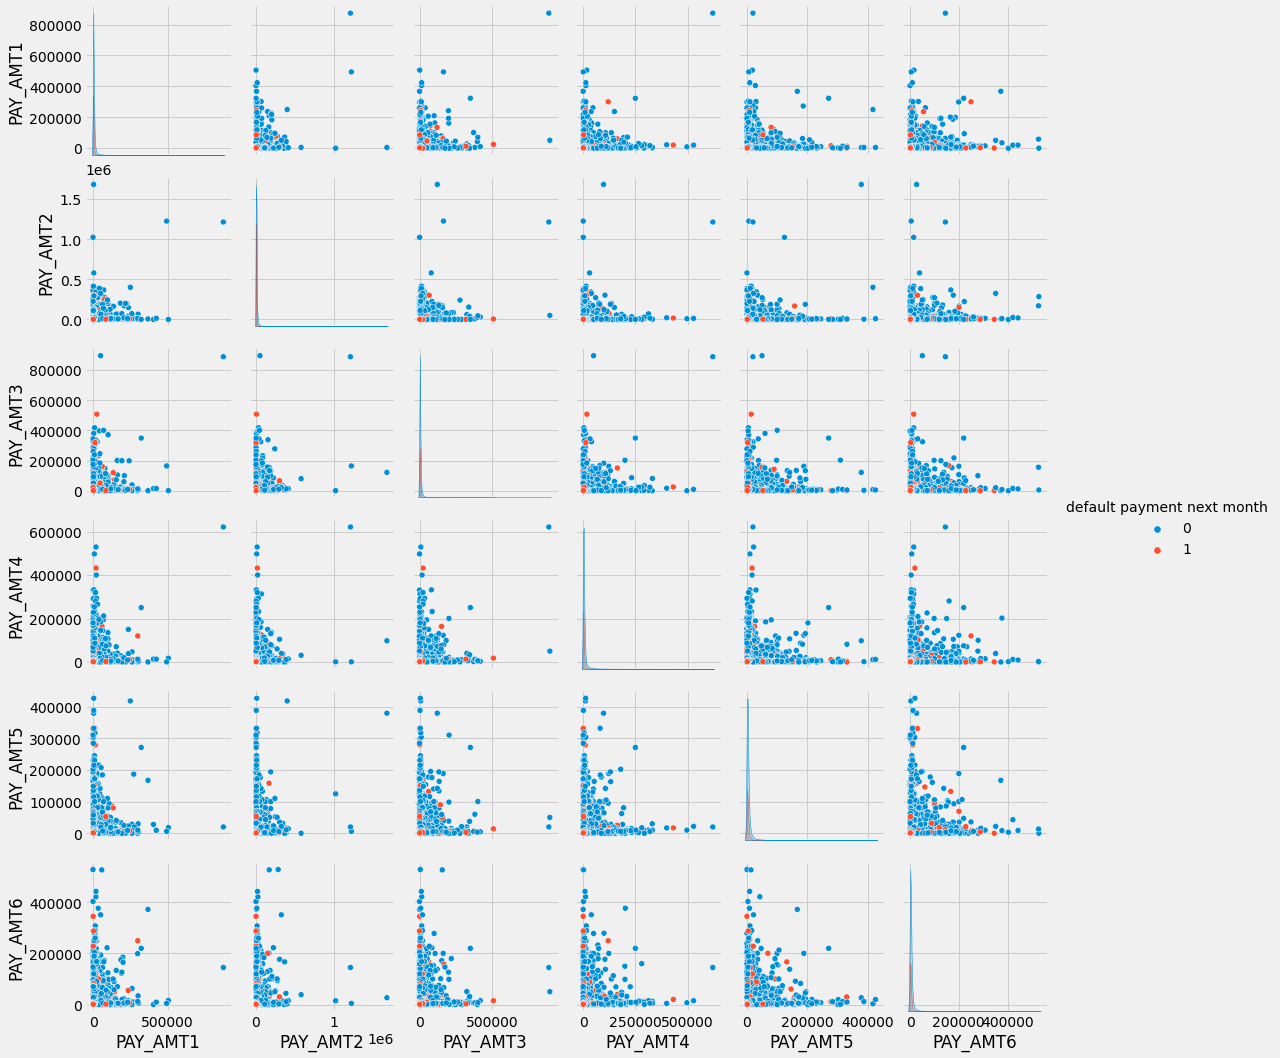

In [56]:
# plot columns with similar names to check the correlation

sns.pairplot(dataset, vars=dataset.columns[11:17], kind='scatter',hue= 'default payment next month')
sns.pairplot(dataset, vars=dataset.columns[17:23],hue = 'default payment next month')

### Step3: Observing  Correlation between features of the Dataset

In [57]:
correlation = dataset.corr()

<AxesSubplot:>

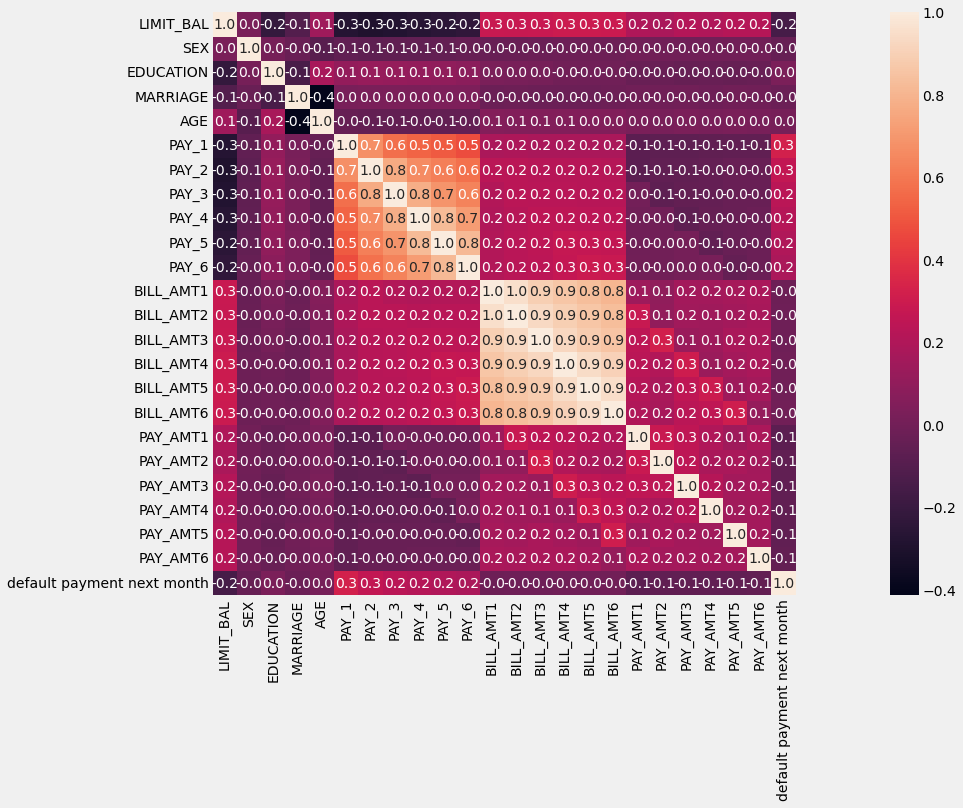

In [58]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

**So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.**

<AxesSubplot:title={'center':'Correlation with Default'}>

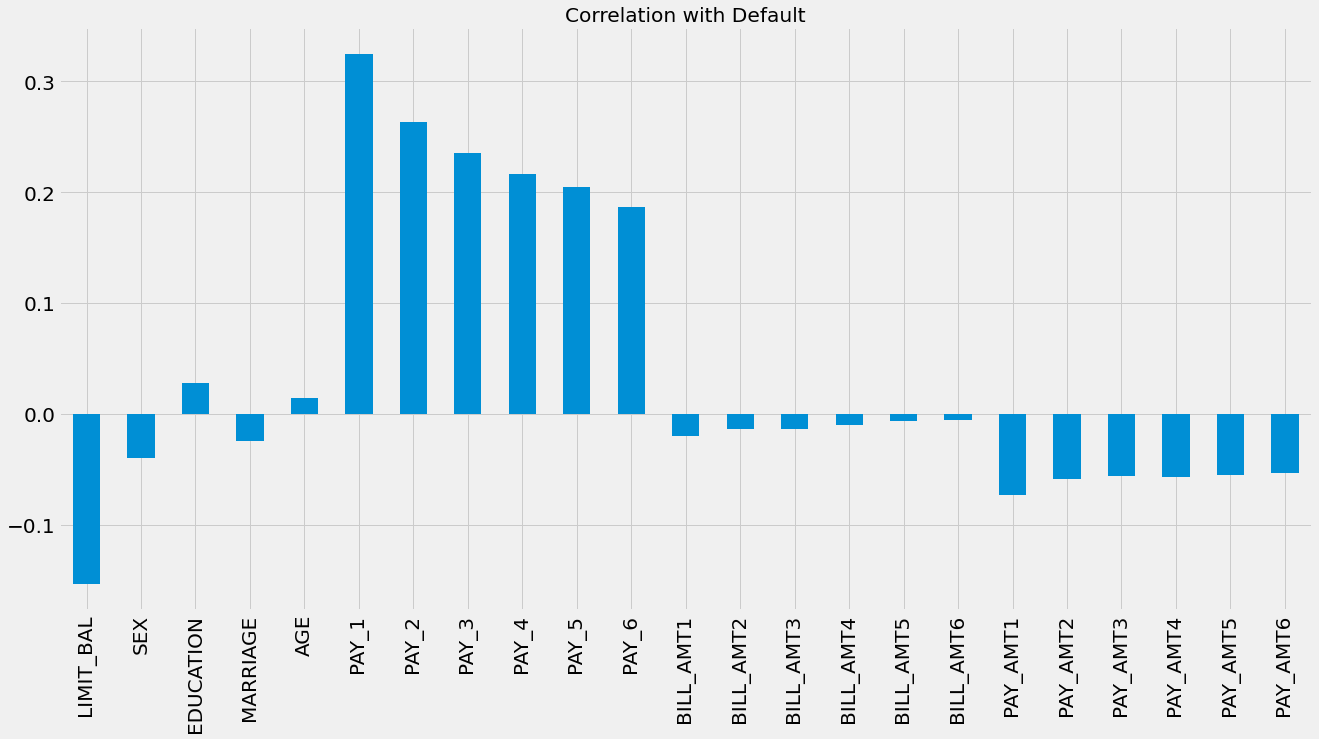

In [60]:

X = dataset.drop(['default payment next month'],axis=1)
X.corrwith(dataset['default payment next month']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

**It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.**



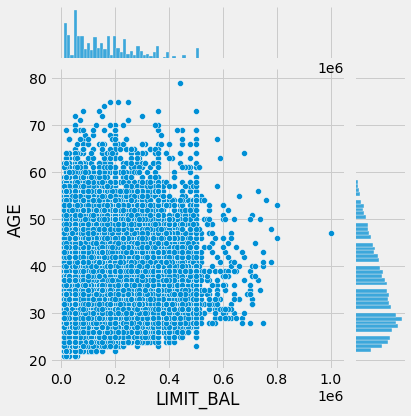

In [61]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset,kind="scatter")


# Facet Grid

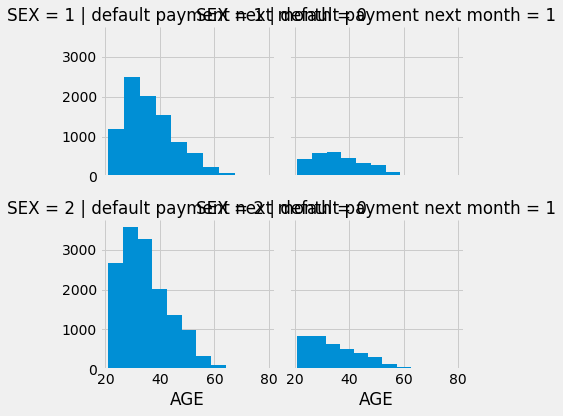

In [62]:
g = sns.FacetGrid(dataset, col = 'default payment next month', row = 'SEX')
g.map(plt.hist, 'AGE')


**From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years**

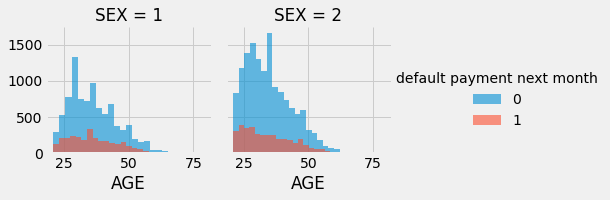

In [63]:
g = sns.FacetGrid(dataset, col='SEX', hue='default payment next month')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

**From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40years**

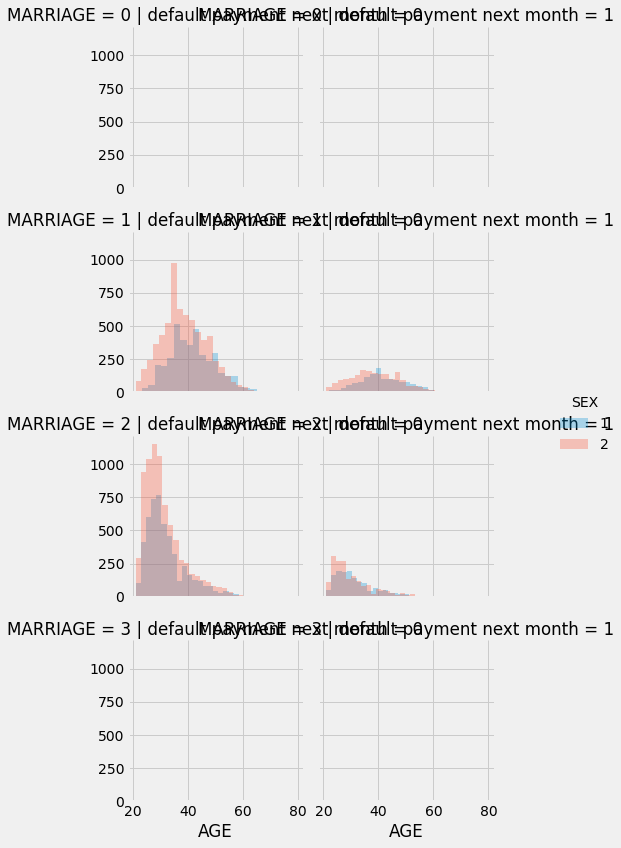

In [64]:
g = sns.FacetGrid(dataset, col='default payment next month', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

### Step4: Data Cleaning

**EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.**

**MARRIAGE has a label 0 that is undocumented**

**Data Transformation**

**The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).**

**The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)**

**Thus is a good occasion to learn how to use the .loc function**

In [65]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [66]:
dataset['EDUCATION'].value_counts(dropna = False)

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [67]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [68]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [69]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [70]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()


0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [71]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [72]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


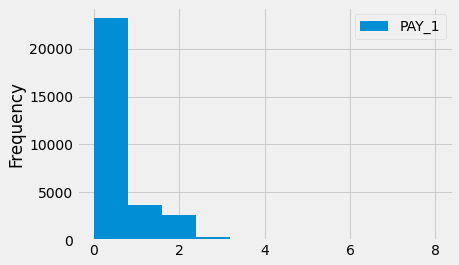

In [73]:

dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [74]:
dataset['PAY_1'].describe()

count    30000.000000
mean         0.356767
std          0.760594
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_1, dtype: float64

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [76]:
dataset.SEX.nunique()

2

In [77]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [78]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [79]:

dataset.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# One Hot encoding for categorical variable

In [80]:
#categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   #'PAY_5','PAY_6']
#dataset[categorical_vars] = dataset[categorical_vars].astype(str)
#dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
#dataset.head()

In [81]:
dataset.shape


(30000, 24)

In [82]:
dataset.columns = dataset.columns.map(str.lower)

In [83]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Step5: Feature Scaling of Numerical Attributes

In [84]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [85]:
dataset.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136720,2,2,1,-1.246020,2,2,0,0,0,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
2,-0.365981,2,2,2,-1.029047,0,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
3,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
4,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
5,-0.905498,1,2,1,2.334029,0,0,0,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
6,-0.905498,1,1,2,0.164303,0,0,0,0,0,...,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381,0
7,2.562830,1,1,2,-0.703588,0,0,0,0,0,...,7.762727,7.281574,7.305617,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207,0
8,-0.520128,2,2,2,-1.354506,0,0,0,0,0,...,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642,0
9,-0.211833,2,3,1,-0.812074,0,0,2,0,0,...,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130,0


In [86]:
dataset.tail(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
29991,-0.211833,1,2,1,0.598248,0,0,0,0,0,...,1.476705,0.154016,0.121727,0.020312,0.046824,-0.056665,-0.211994,-0.183229,-0.180878,0
29992,0.327685,1,2,1,-0.161156,3,2,2,2,2,...,-0.633636,-0.621938,-0.610745,-0.341942,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382,1
29993,-1.213794,1,3,1,0.815221,0,0,0,0,0,...,-0.672497,-0.663059,-0.652724,-0.221191,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382,0
29994,-0.520128,1,1,2,0.272789,0,0,0,0,0,...,0.425343,0.479662,0.270888,-0.221191,4.594644,-0.069615,-0.116564,-0.183229,-0.180878,0
29995,-0.674276,1,2,2,-0.161156,2,2,2,2,2,...,0.532490,0.695695,0.710059,0.080687,-0.105083,-0.296801,0.138768,-0.314136,-0.068374,1
29996,0.404759,1,3,1,0.381275,0,0,0,0,0,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29997,-0.134759,1,3,2,0.815221,0,0,0,0,0,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29998,-1.059646,1,2,2,0.164303,4,3,2,0,0,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29999,-0.674276,1,3,1,0.598248,1,0,0,0,0,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


### Step6: Spiliting Dataset into training(70%) and test set(30%)

In [89]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [90]:
X_train.shape

(21000, 23)

In [91]:
X_test.shape

(9000, 23)

### Step7: Applying Machine Learning Algorithm for Classification Problem

### Logistic Regression 
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used



In [92]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [93]:
y_pred = logmodel.predict(X_test)

In [94]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815333,0.680556,0.3185,0.433924,0.637893


### Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It is on of the Gradient Descent Algorithm.It uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

In [95]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [96]:
y_pred = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.811667,0.669633,0.301,0.415316,0.629286


### K-Nearest Neighbour
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

   * Load the data
   * Initialise the value of k
   * For getting the predicted class, iterate from 1 to total number of training data points
   * Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
   * Sort the calculated distances in ascending order based on distance values
   * Get top k rows from the sorted array
   * Get the most frequent class of these rows
   * Return the predicted class
   

Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

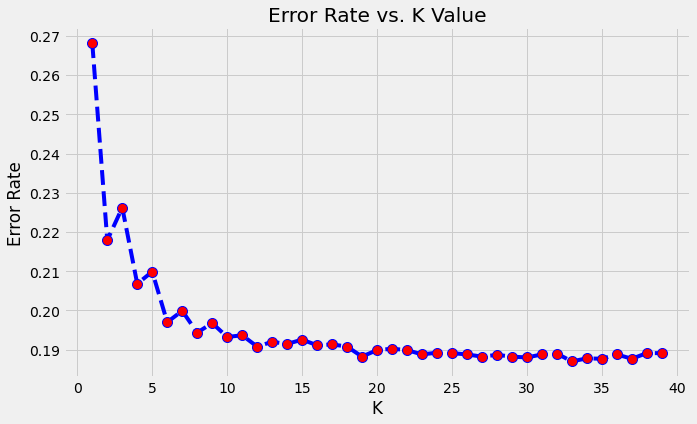

In [99]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)


In [101]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [102]:
y_pred = knn.predict(X_test)

In [103]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.800111,0.584383,0.348,0.436227,0.638643


### Support Vector Machine
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.


In [104]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [105]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

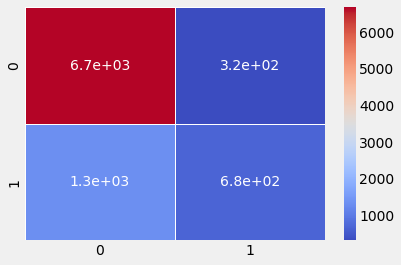

In [107]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [108]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.817556,0.680444,0.3375,0.451203,0.646107


### Gaussian Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [110]:
y_pred =naive_bayes.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [112]:
cm

array([[5827, 1173],
       [ 904, 1096]])

In [113]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.769222,0.483032,0.548,0.513469,0.690214


### Decision Tree Classification
The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

#### Advantages of Decision Trees

Decision trees are easy to interpret.
To build a decision tree requires little data preparation from the user- there is no need to normalize data

#### Disadvantages of Decision Trees

Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.


In [114]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [115]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [116]:
y_pred = dct.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [118]:
cm

array([[5825, 1175],
       [1179,  821]])

In [119]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.738444,0.411323,0.4105,0.410911,0.621321


### Random Forest Classification
Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

**Step1:-** Pick at random K data points from the training set

**Step2:-** Build the Decision tree associated to these K data points

**Step3:-** Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

**Step4:-** For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote 

In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [121]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [122]:
y_pred = rfc.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [124]:
cm

array([[6612,  388],
       [1290,  710]])

In [125]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.813556,0.64663,0.355,0.45836,0.649786


### XGBOOST classifier
It is Gradient Boosting Algorithm

In [127]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[11:59:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
y_pred =xgb.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [130]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.815333,0.657356,0.353,0.459336,0.650214


## Step8: Model Optimization using Grid Search and K-Fold Cross validation
There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

In [131]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

### 1)Grid Search on Logistic Regression Model 

In [132]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [133]:
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [136]:
grid_search_log = grid_search.fit(X_train,y_train)

NameError: name 'grid_search' is not defined

In [425]:
best_accuracy = grid_search_log.best_score_

In [426]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.82


In [427]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 10, 'class_weight': None, 'penalty': 'l1'}

In [428]:
y_pred_log = grid_search_log.predict(X_test)

In [429]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [430]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825,0.683333,0.322835,0.438503,0.641333


### 2)Grid Search on Stochastic Gradient Descent 

In [353]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)


In [216]:
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8185714285714286


In [138]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2

{'alpha': 0.01, 'class_weight': None}

In [139]:
y_pred_sgd = grid_search_sgd.predict(X_test)

In [140]:
sgd_prob = grid_search_sgd.predict_proba(X_test)

In [150]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)
model =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.833333,0.714286,0.354331,0.473684,0.658138


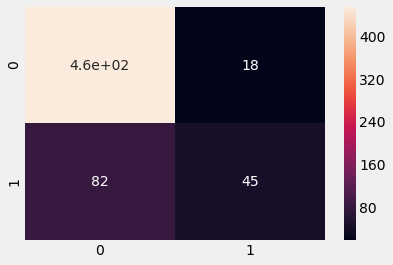

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm,annot=True)

### 3)Grid Search on SVM model w

In [143]:
scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
               {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]
               

In [144]:
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_1 = grid_search_1.fit(X_train,y_train)

In [215]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8121428571428572


In [146]:
best_parameters = grid_search_1.best_params_
best_parameters

{'C': 0.01, 'kernel': 'linear'}

In [147]:
y_pred_svc =grid_search_1.predict(X_test)

In [151]:
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
model =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.833333,0.714286,0.354331,0.473684,0.658138
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443


### 4)Grid Search on KNN Classifier 

We will be using the optimsed-for-performance implemented function of KNN provided by the scikit-learn package. We will also loop over k=1 to 30 and observe the recall in all these cases to find the best suitable value of K for our problem.

In [152]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}


In [153]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [214]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.81


In [155]:
best_parameters = grid_search.best_params_
best_parameters

{'leaf_size': 1, 'n_neighbors': 24, 'weights': 'uniform'}

In [156]:
y_pred_KNN = grid_search.predict(X_test)

In [158]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.833333,0.714286,0.354331,0.473684,0.658138
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872


### 5)Grid Search on Decision Tree w

In [159]:
#dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)

In [212]:
best_accuracy_1 = grid_search_dt.best_score_

In [213]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8242857142857143


In [162]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [163]:
y_pred_dct = grid_search_dt.predict(X_test)

In [165]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.833333,0.714286,0.354331,0.473684,0.658138
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567


### 6)Grid Search on Random Forest Classifier w


In [166]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [210]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.825


In [168]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 1000}

In [169]:
y_pred_rf = grid_search_rf.predict(X_test)

In [171]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.833333,0.714286,0.354331,0.473684,0.658138
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
5,Random Forest Tuned,0.810000,0.606557,0.291339,0.393617,0.620299


### 7)Grid Search on XGBOOST Classifier w

In [354]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
grid_seaech_xgb = grid_search_xgb.fit(X_train,y_train)

In [355]:
best_accuracy_1 = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8221428571428572


In [356]:
best_parameters_2 = grid_search_xgb.best_params_
best_parameters_2

{'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50}

In [357]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [177]:
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.833333,0.714286,0.354331,0.473684,0.658138
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
5,Random Forest Tuned,0.810000,0.606557,0.291339,0.393617,0.620299
6,XGBOOST Tuned,0.821667,0.685185,0.291339,0.408840,0.627699


### ROC Curve 
**Receiver Operating Characteristic(ROC)** summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate. 

ROC summarizes the predictive power for all possible values of p > 0.5.  The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

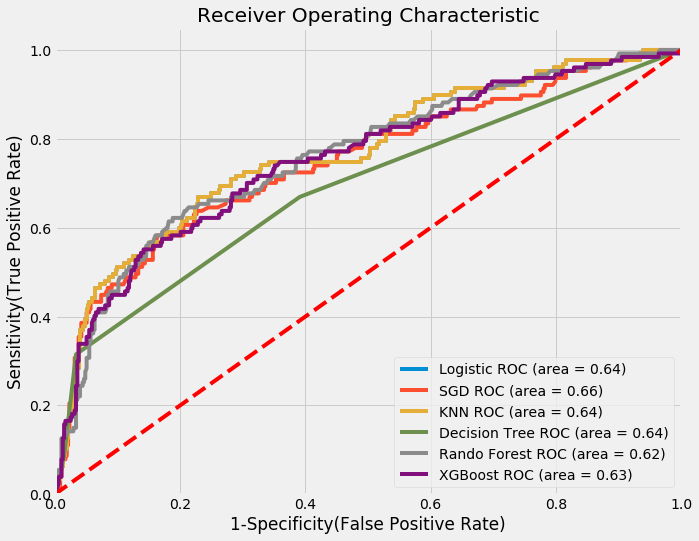

In [500]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_log_p =grid_search_log.predict_proba(X_test)[:,1]
y_pred_sgd_p =grid_search_sgd.predict_proba(X_test)[:,1]
#y_pred_svc_p =grid_search_1.predict_proba(X_test)[:,1]
y_pred_knn_p =grid_search.predict_proba(X_test)[:,1]
y_pred_dt_p =grid_search_dt.predict_proba(X_test)[:,1]
y_pred_rf_p =grid_search_rf.predict_proba(X_test)[:,1]
y_pred_xgb_p =grid_search_xgb.predict_proba(X_test)[:,1]

model = [grid_search_log,grid_search_sgd,grid_search,grid_search_dt,grid_search_rf,grid_search_xgb]

models=[y_pred_log_p,y_pred_sgd_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
label=['Logistic','SGD','KNN','Decision Tree','Rando Forest','XGBoost']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(6)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### For Model Evaluation we are referreing Confusion Matrix
After we train a logistic regression model on some training data, we will evaluate the performance of the model on some test data. For this, we use the Confusion Matrix


the accuracy of the model : - ( TP + TN ) / Total

Here, TP stands for True Positive which are the cases in which we predicted yes and the actual value was true. TN stands for True Negative which are the cases in which we predicted no and the actual value was false.FP stands for False Positive which are the cases which we predicted yes and the actual value was False.FN stands for False Negative which are the cases which we predicted No and the actual value was true.

## Conclusion
1)Using a **Logistic Regression**  classifier, we can predict with **82.5% accuracy**, whether a customer is likely to default next month.

2)Using a **Stochastic Gradient Descent**  classifier, we can predict with **83.33% accuracy**, whether a customer is likely to default next month.

3)Using a **Support Vector Machine**  classifier, we can predict with **80.83% accuracy**, whether a customer is likely to default next month.

4)Using a **K-Nearest Neighbour**  classifier, we can predict with **80.83% accuracy**, whether a customer is likely to default next month.

5)Using a **Decision Tree  classifier**, we can predict with **82.83% accuracy**, whether a customer is likely to default next month.

6)Using a **Random Forest  classifier**, we can predict with **81% accuracy**, whether a customer is likely to default next month.

7)Using a **XGBOOST**  classifier, we can predict with **82.16% accuracy**, whether a customer is likely to default next month.


The strongest predictors of default are the **PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months)**.

**We found that using Stochastic Gradient Descent and Decision Tree are better.**

**Demographics**: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.